In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('car data.csv')

# Display first few rows
print(data.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [2]:
# Check for missing values
print(data.isnull().sum())

# Optionally, you can fill missing values or drop rows/columns
data = data.fillna(method='ffill')  # Example of forward filling


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


C:\Users\Shubhi\AppData\Local\Temp\ipykernel_34060\2635630906.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Example of forward filling


In [5]:
from sklearn.preprocessing import LabelEncoder

# Check if 'Car_Name' exists in the dataset
if 'Car_Name' in data.columns:
    label_encoder = LabelEncoder()
    data['Car_Name'] = label_encoder.fit_transform(data['Car_Name'])  # Encoding car names
    print(data['Car_Name'].head())  # Display the first few encoded car names
else:
    print("Column 'Car_Name' not found in the dataset")


0    90
1    93
2    68
3    96
4    92
Name: Car_Name, dtype: int64


C:\Users\Shubhi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shubhi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [7]:
from sklearn.model_selection import train_test_split

X = data[['Car_Name', 'Selling_Price', 'Present_Price', 'Fuel_Type']]  # Example features
y = data['Selling_type']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Now check the dataset to ensure all columns are numeric
print(data.head())


   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Owner  \
0        90  2014           3.35           5.59       27000      0   
1        93  2013           4.75           9.54       43000      0   
2        68  2017           7.25           9.85        6900      0   
3        96  2011           2.85           4.15        5200      0   
4        92  2014           4.60           6.87       42450      0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  \
0             False              True                    False   
1              True             False                    False   
2             False              True                    False   
3             False              True                    False   
4              True             False                    False   

   Transmission_Manual  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True  


In [10]:
print(data.dtypes)


Car_Name                     int64
Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Owner                        int64
Fuel_Type_Diesel              bool
Fuel_Type_Petrol              bool
Selling_type_Individual       bool
Transmission_Manual           bool
dtype: object


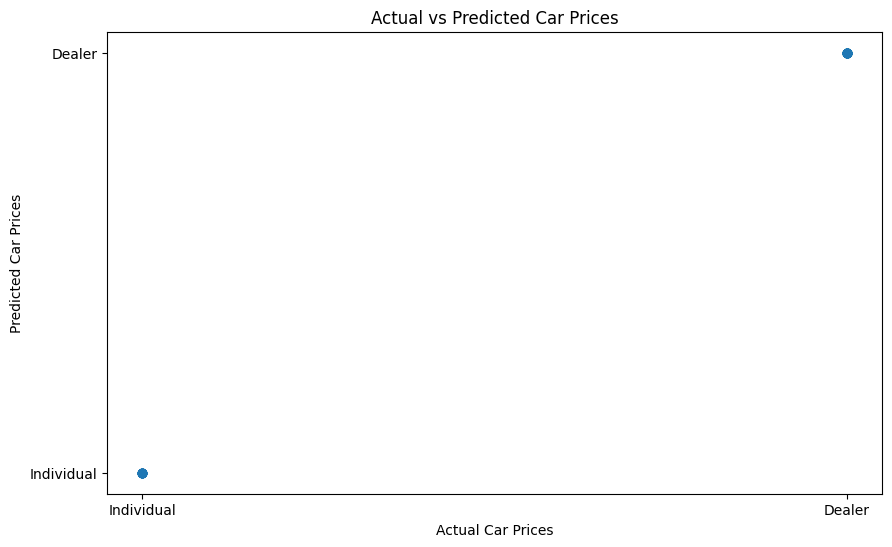

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test, alpha=0.5)
plt.xlabel('Actual Car Prices')
plt.ylabel('Predicted Car Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()


C:\Users\Shubhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shubhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


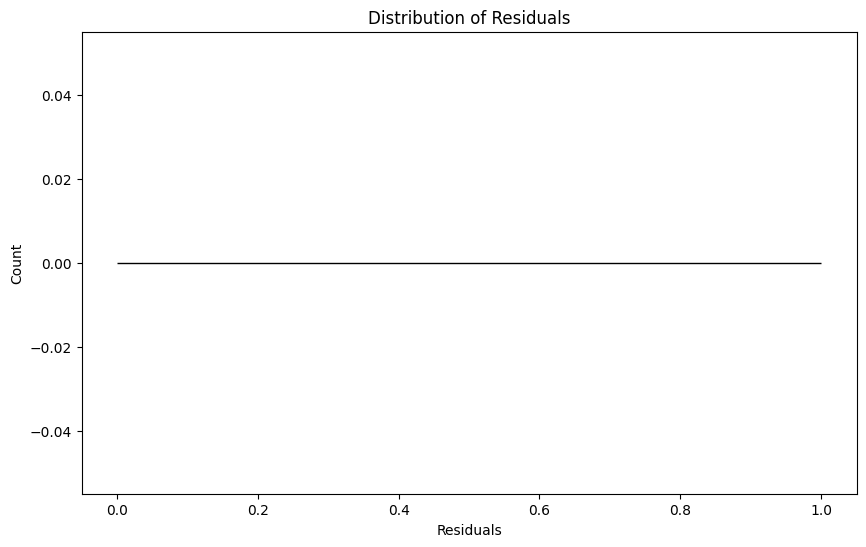

In [16]:
# Residuals plot
residuals = y_test - y_train

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
